In [2]:
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

print(tf.VERSION)

1.15.0-rc3


In [3]:
print(tf.keras.__version__)

2.2.4-tf


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

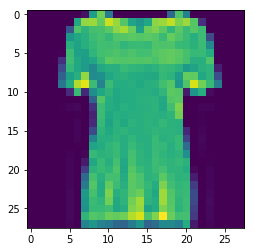

In [11]:
plt.figure()
plt.imshow(np.squeeze(train_images[10]))

In [12]:
train_labels[10]

0

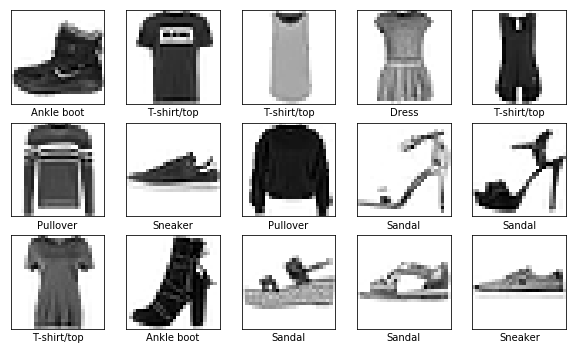

In [13]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()  

In [0]:
train_image=train_images.reshape((60000,28,28,1))
test_image=test_images.reshape((10000,28,28,1))

In [0]:
train_image_norm=train_image/255.0

In [0]:
test_image_norm=test_image/255.0

In [0]:
conv1=layers.Conv2D(32,(3,3),activation='relu' , input_shape=(28,28,1))

In [0]:
conv2=layers.Conv2D(64,(3,3),activation='relu')

In [0]:
conv3=layers.Conv2D(128,(3,3),activation='relu')

In [0]:
max_pool_1=layers.MaxPooling2D((2,2))
max_pool_2=layers.MaxPooling2D((2,2))
max_pool_3=layers.MaxPooling2D((2,2))

In [0]:
flat_layer=layers.Flatten()

In [0]:
fc=layers.Dense(128,activation='relu')

In [0]:
output=layers.Dense(10,'softmax')

In [24]:
model=models.Sequential()
model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(train_image_norm, train_labels, epochs=20, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 399s 7ms/sample - loss: 0.5868 - acc: 0.7932 - val_loss: 0.3616 - val_acc: 0.8730
Epoch 2/20
54000/54000 [==============================] - 395s 7ms/sample - loss: 0.3182 - acc: 0.8872 - val_loss: 0.2860 - val_acc: 0.8960
Epoch 3/20
54000/54000 [==============================] - 395s 7ms/sample - loss: 0.2616 - acc: 0.9042 - val_loss: 0.2603 - val_acc: 0.9072
Epoch 4/20
54000/54000 [==============================] - 395s 7ms/sample - loss: 0.2224 - acc: 0.9207 - val_loss: 0.2550 - val_acc: 0.9082
Epoch 5/20
54000/54000 [==============================] - 398s 7ms/sample - loss: 0.1954 - acc: 0.9290 - val_loss: 0.2375 - val_acc: 0.9102
Epoch 6/20
54000/54000 [==============================] - 408s 8ms/sample - loss: 0.1668 - acc: 0.9389 - val_loss: 0.2309 - val_acc: 0.9175
Epoch 7/20
54000/54000 [==============================] - 404s 7ms/sample - loss: 0.1491 - acc: 0.9453 - val_lo

In [28]:
test_loss,test_accuracy=model.evaluate(test_image_norm,test_labels)

10000/10000 [==============================] - 23s 2ms/sample - loss: 0.4716 - acc: 0.9192


In [30]:
print(test_accuracy)

0.9192


In [38]:
train_loss,train_accuracy=model.evaluate(train_image_norm,train_labels)

60000/60000 [==============================] - 141s 2ms/sample - loss: 0.0548 - acc: 0.9887


In [32]:
#accuracy plot
print(model.history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


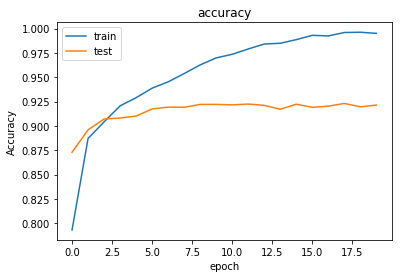

In [36]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc='upper left')
plt.show()

loss plot


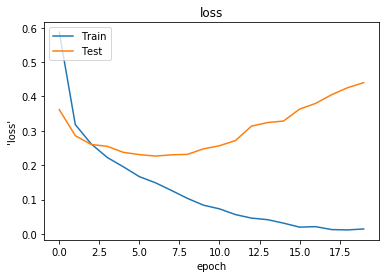

In [39]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("loss")
plt.ylabel("'loss'")
plt.xlabel("epoch")
plt.legend(['Train','Test'],loc="upper left")
plt.show()

In [0]:
predicted_test=model.predict(test_image_norm)



In [41]:
predicted_test.shape

(10000, 10)

array([4.9821718e-22, 7.8931570e-19, 7.6482906e-13, 2.7399648e-17,
       3.1218599e-09, 1.0843410e-27, 1.0000000e+00, 1.6883076e-32,
       1.1172991e-19, 4.0118616e-23], dtype=float32)

In [52]:
from sklearn.metrics import confusion_matrix
pr=[]
for i in range(len(test_images)):
    predicted_test_index=np.argmax(predicted_test[i])
    pr.append(predicted_test_index)
confusion=confusion_matrix(test_labels,pr)  
print(confusion)

6

In [54]:
test_labels[7]

6

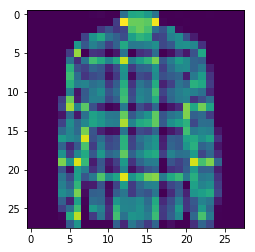

In [56]:
plt.figure()
plt.imshow(np.squeeze(test_image[7]))